In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
Points = np.array([361.0, 115.0,
522.0, 130.0,
576.0, 317.0,
409.0, 457.0,
202.0, 439.0,
698.0, 219.0,
651.0, 419.0,
104.0, 251.0,
432.0, 94.0,
395.0, 254.0,
211.0, 372.0,
545.0, 520.0,
170.0, 510.0,
51.0,  341.0,
185.0, 138.0,
560.0, 100.0,
641.0, 188.0,
325.0, 265.0,
672.0, 345.0,
676.0, 463.0])
index  = np.array([i for i in range(40)])

X = Points[np.where(index % 2 == 0)]
Y = Points[np.where(index % 2 == 1)]

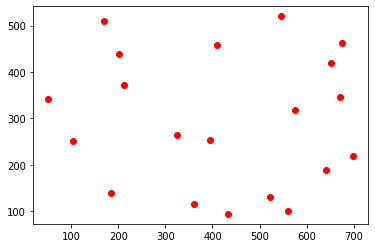

In [32]:
plt.plot(X, Y, 'ro')
plt.show()

In [33]:
d = np.array([[1e9 for i in range(20)] for i in range(20)])

for p in range(400):
    u = p // 20
    v = p % 20
    
    d[u, v] = math.sqrt((X[u] - X[v]) * (X[u] - X[v]) + (Y[u] - Y[v]) * (Y[u] - Y[v]))

In [34]:
def local_search(W_init, d):
    Found = True
    
    while (Found):
        Found = False
        for i in range(20):
            a = W_init[i]
            b = W_init[(i + 1) % 20]

            for j in range(i - 1):
                u = W_init[j]
                v = W_init[j + 1]

                if (d[u, v] + d[a, b] > d[u, a] + d[v, b]):
                    l = j + 1
                    r = i

                    while (l < r):
                        W_init[l], W_init[r] = W_init[r], W_init[l]
                        l += 1
                        r -= 1

                    Found = True
                    break

            if (Found):
                break
    
    return  W_init

In [35]:
W_init = [i for i in range(20)]

W = local_search(W_init, d)
print(W)

[0, 8, 1, 15, 16, 5, 2, 18, 6, 19, 11, 3, 12, 4, 10, 13, 7, 14, 17, 9]


In [36]:
X = X[W]
Y = Y[W]

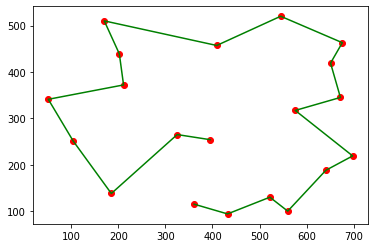

In [37]:
plt.plot(X, Y, 'ro')
plt.plot(X, Y, 'g-')
plt.show()